# Effect of LSD and music experience on brain states during resting state #

This notebook is used for analysis of the effect of LSD and music experience on brain states during resting state.

We calculate states' measures:
1) fractional occupancy 
2) dwell time 
3) transition probability 

Then, for each of these mesures we perform KS-tests to check if variables have a normal distirubtion. If so, we use t-test to test out hypothesis, otherise we use permutation non-parametric test.

Number of states = 5

**Last update:** 09.12.2022

### Step 0: Loading libraries ####

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from nilearn import plotting
from nilearn.plotting import plot_matrix
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, norm, kstest
%matplotlib inline
!pip install mlxtend 
from mlxtend.evaluate import permutation_test

/home/iga/miniconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Step 1: Loading data ####

In [3]:
#Loading all data
df_merge = pd.read_csv('data/5_states/df_merge.csv')
data_r1_r3 = df_merge[df_merge['Run'] != 2]

### Step 2: Plotting fractional occupancy for run 1 (resting state) and run 3 (resting state) ###

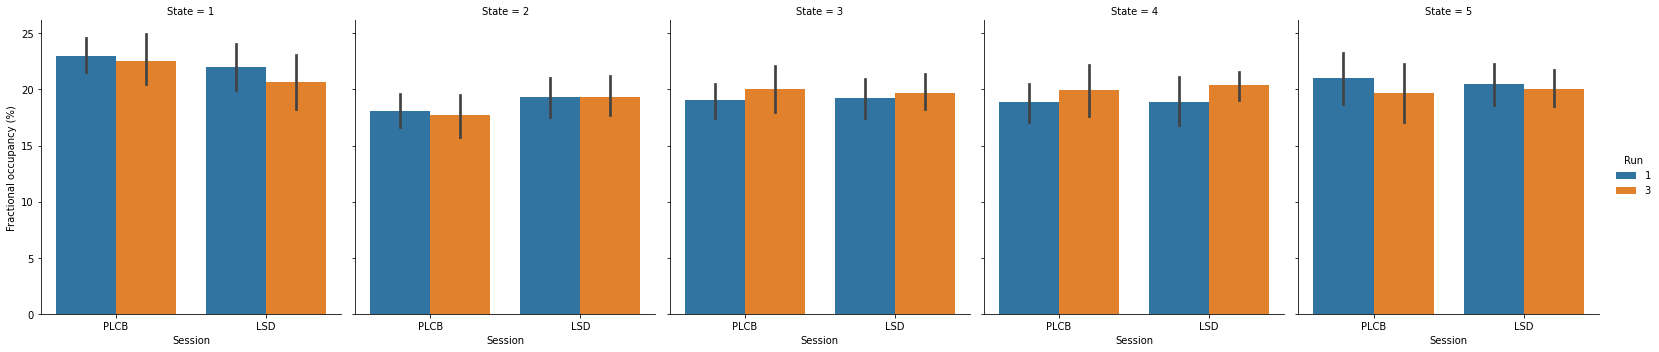

In [4]:
sns.catplot(x = 'Session', y = 'Fractional occupancy (%)', hue = 'Run', col = 'State', kind = 'bar', data = data_r1_r3,  height=5, aspect=0.9)
plt.savefig('Figures/fo_run13.png', dpi=300, bbox_inches='tight')

### Step 3: Plotting dwell time for run 1 (resting state) and run 3 (resting state) ###

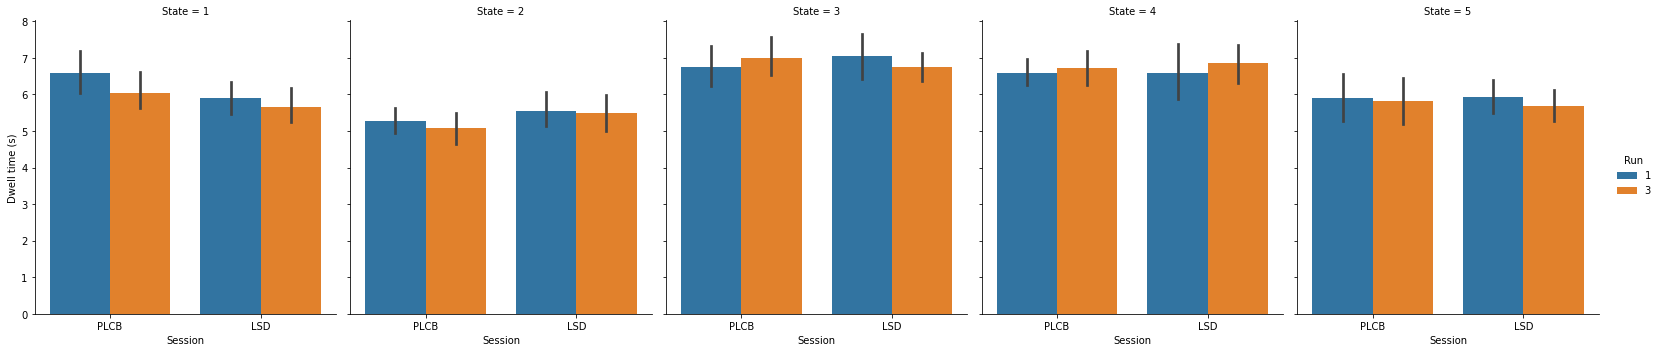

In [5]:
sns.catplot(x = 'Session', y = 'Dwell time (s)', hue = 'Run', col = 'State', kind = 'bar', data = data_r1_r3,  height=5, aspect=0.9)
plt.savefig('Figures/dt_run13.png', dpi=300, bbox_inches='tight')

## **Fractional occupancy analysis** ##

### Step 4: Performing t-test for each state for fractional occupancy (run 1 vs run 3 for each session) ###

In [6]:
#Selecting states and sessions
states = [1,2,3,4,5]
sessions = ['PLCB', 'LSD']

iterator = np.arange(5) 

#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        fo_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        fo_run1 = []
        fo_run3 = []
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run3.append(row['Fractional occupancy (%)'])
                
        stat_t, pval_t = ttest_rel(fo_run1, fo_run3) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: 0.4248858699011181, p-value: 0.677377593007834

Paired T-test for state 1, session LSD | statistics: 0.9285614020474153, p-value: 0.3688501562573334

Paired T-test for state 2, session PLCB | statistics: 0.45811443109774697, p-value: 0.6539002301994089

Paired T-test for state 2, session LSD | statistics: 0.02354967576525063, p-value: 0.9815441826985726

Paired T-test for state 3, session PLCB | statistics: -0.8621700155689342, p-value: 0.40312097024519444

Paired T-test for state 3, session LSD | statistics: -0.4633831313075265, p-value: 0.650211521233527

Paired T-test for state 4, session PLCB | statistics: -0.9281035464148941, p-value: 0.369079424727459

Paired T-test for state 4, session LSD | statistics: -1.3253528826491905, p-value: 0.20627711610098365

Paired T-test for state 5, session PLCB | statistics: 0.7923520950858545, p-value: 0.4413758592553454

Paired T-test for state 5, session LSD | statistics: 0.4058024286532795,

### Step 5: Performing t-test for each state for fractional occupancy (difference between run 3 and run 1) ###

In [7]:
#Iterating over states and sessions
for i in iterator:
    diff_list = []
    for j in sessions:
        fo_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        fo_run1 = []
        fo_run3 = []
        
        for index, row in fo_state.iterrows():
            if row['Run'] == 1:
                fo_run1.append(row['Fractional occupancy (%)'])
            else:
                fo_run3.append(row['Fractional occupancy (%)'])
                
        diff = np.array(fo_run3) - np.array(fo_run1) #Calculating the difference between run 3 and run 1
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: 0.6110419185895263, p-value: 0.5509646075084396

Paired T-test for state 2 | statistics: -0.20554977701167723, p-value: 0.8401014494036574

Paired T-test for state 3 | statistics: 0.3856386841804834, p-value: 0.7055606073808978

Paired T-test for state 4 | statistics: -0.264409926512702, p-value: 0.7953167947735458

Paired T-test for state 5 | statistics: -0.41719752600132015, p-value: 0.6828608367701463



### Step 6: Performing t-test for run 3 for fractional occupancy (placebo vs LSD for each run) ###

In [8]:
#Selecting runs
runs = [3]

#Iterating over states and runs
for i in iterator:
    fo_plcb = []
    fo_lsd = []
    for j in runs:
        fo_run = data_r1_r3[data_r1_r3['Run'] == j]
        for index, row in fo_run.iterrows():
            if row['State'] == i+1:
                if row['Session'] == 'PLCB':
                    fo_plcb.append(row['Fractional occupancy (%)'])
                else:
                    fo_lsd.append(row['Fractional occupancy (%)'])
                    
        stat_t, pval_t = ttest_rel(fo_plcb, fo_lsd) #Calculating paired t-test
        print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for run 3, state 1| statistics: 1.1935451684876106, p-value: 0.2524895305933041

Paired T-test for run 3, state 2| statistics: -1.0181979298038855, p-value: 0.32585785548592516

Paired T-test for run 3, state 3| statistics: 0.3315835399700312, p-value: 0.7451152340612361

Paired T-test for run 3, state 4| statistics: -0.3553221016146221, p-value: 0.7276446604428295

Paired T-test for run 3, state 5| statistics: -0.19600846774871428, p-value: 0.8474201195637121



## **Dwell time analysis** ##

### Step 7: Performing t-test for each state for dwell time (run 1 vs run 3 for each session) ###

In [9]:
#Iterating over states and sessions
for i in iterator:
    for j in sessions:
        dt_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        dt_run1 = []
        dt_run3 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run3.append(row['Dwell time (s)'])
                
        stat_t, pval_t = ttest_rel(dt_run1, dt_run3) #Calculating paired t-test
        print(f'Paired T-test for state {i+1}, session {j} | statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for state 1, session PLCB | statistics: 1.3306973660542485, p-value: 0.20455670683373608

Paired T-test for state 1, session LSD | statistics: 0.7534657368078822, p-value: 0.4636538829097786

Paired T-test for state 2, session PLCB | statistics: 0.9001885323957629, p-value: 0.3832434495100403

Paired T-test for state 2, session LSD | statistics: 0.2532916610959107, p-value: 0.8037244414026979

Paired T-test for state 3, session PLCB | statistics: -0.7560088802951753, p-value: 0.4621759358283225

Paired T-test for state 3, session LSD | statistics: 0.8800301844301025, p-value: 0.39369881631434456

Paired T-test for state 4, session PLCB | statistics: -0.45075836859515406, p-value: 0.659066061121058

Paired T-test for state 4, session LSD | statistics: -0.7062388090604457, p-value: 0.4916264171986793

Paired T-test for state 5, session PLCB | statistics: 0.19675119090855772, p-value: 0.8468498788859847

Paired T-test for state 5, session LSD | statistics: 0.7137268188915095

### Step 8: Performing t-test for each state for dwell time (difference between run 3 and run 1) ###

In [10]:
for i in iterator:
    diff_list = []
    for j in sessions:
        dt_state = data_r1_r3[(data_r1_r3['State'] == i+1) & (data_r1_r3['Session'] == j)]
        dt_run1 = []
        dt_run3 = []
        for index, row in dt_state.iterrows():
            if row['Run'] == 1:
                dt_run1.append(row['Dwell time (s)'])
            else:
                dt_run3.append(row['Dwell time (s)'])
                
        diff = np.array(dt_run3) - np.array(dt_run1)
        diff_list.append(diff)
        
    stat_t, pval_t = ttest_rel(diff_list[0], diff_list[1]) #Calculating paired t-test
    print(f'Paired T-test for state {i+1} | statistics: {stat_t}, p-value: {pval_t}')
    print('')

Paired T-test for state 1 | statistics: -0.6382336536519776, p-value: 0.5336231315571274

Paired T-test for state 2 | statistics: -0.3369580553434251, p-value: 0.7411466379058969

Paired T-test for state 3 | statistics: 1.1879670480820697, p-value: 0.25461009081900343

Paired T-test for state 4 | statistics: -0.27321514922600726, p-value: 0.7886768925457057

Paired T-test for state 5 | statistics: 0.3109256242858915, p-value: 0.760438361297929



### Step 9: Performing t-test for run 3 for dwell time (placebo vs LSD for each run) ###

In [11]:
runs = [3]

#Iterating over states and runs
for i in iterator:
    dt_plcb = []
    dt_lsd = []
    for j in runs:
        dt_run = data_r1_r3[data_r1_r3['Run'] == j]
        for index, row in dt_run.iterrows():
            if row['State'] == i+1:
                if row['Session'] == 'PLCB':
                    dt_plcb.append(row['Dwell time (s)'])
                else:
                    dt_lsd.append(row['Dwell time (s)'])
                    
        stat_t, pval_t = ttest_rel(dt_plcb, dt_lsd) #Calculating paired t-test
        print(f'Paired T-test for run {j}, state {i+1}| statistics: {stat_t}, p-value: {pval_t}')
        print('')

Paired T-test for run 3, state 1| statistics: 1.0023843828017596, p-value: 0.3331693790248127

Paired T-test for run 3, state 2| statistics: -1.218250328266202, p-value: 0.2432617131142617

Paired T-test for run 3, state 3| statistics: 0.7740456441051913, p-value: 0.45177791925838096

Paired T-test for run 3, state 4| statistics: -0.41849370003847197, p-value: 0.6819351053896284

Paired T-test for run 3, state 5| statistics: 0.3827078917435227, p-value: 0.7076839411425473



## **Transition probability analysis** ##

### Step 10: Loading data ###

In [3]:
#Loading all data
bs_all = np.load('data/fixed_brain_states_reshaped.npy', allow_pickle = True).item()

#Loading data for each session (placebo / LSD) and run (rest 1 / rest 2 )
bs_plcb_run1 = bs_all['PLCB']['run_1'][3,:,:]
bs_plcb_run3 = bs_all['PLCB']['run_3'][3,:,:]

bs_lsd_run1 = bs_all['LSD']['run_1'][3,:,:]
bs_lsd_run3 = bs_all['LSD']['run_3'][3,:,:]

### Step 11: Calculating transition probability for placebo session ###

In [4]:
states_no = 5

plcb_all = [bs_plcb_run1, bs_plcb_run3]
state_transitions_plcb = np.zeros((bs_plcb_run1.shape[0], 2, states_no, states_no))

for s, bs in enumerate(plcb_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_plcb[sub, s, i, j] = p
                    
np.save('data/5_states/state_transitions_plcb_2.npy', state_transitions_plcb)

### Step 12: KS-test for transition probability for placebo session run 1 & 3 ###

#### Step 12.1: KS-test for transition probability, placebo session run 1

KS-test for transition probability, placebo session, run 1: statistics 0.3322820523444586, p-value 2.0999654083706615e-37


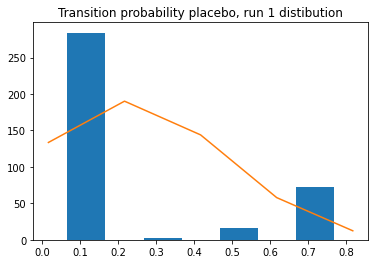

In [14]:
plcb_run1 = state_transitions_plcb[:,0,:,:]

p1_trans1 = np.concatenate(plcb_run1, axis = 0)
plcb1 = np.concatenate(p1_trans1, axis = 0)

p1_loc, p1_scale = norm.fit(plcb1)
n1 = norm(loc=p1_loc, scale=p1_scale)
p1_stat, p1_pval = kstest(plcb1, n1.cdf)
print(f'KS-test for transition probability, placebo session, run 1: statistics {p1_stat}, p-value {p1_pval}')

plt.hist(plcb1, bins=np.arange(plcb1.min(), plcb1.max()+0.2, 0.2), rwidth=0.5)
p1_x = np.arange(plcb1.min(), plcb1.max()+0.2, 0.2)
plt.plot(p1_x, 120*n1.pdf(p1_x))
plt.title('Transition probability placebo, run 1 distibution')
plt.show()

#### Step 12.2: KS-test for transition probability, placebo session run 3

KS-test for transition probability, placebo session, run 3: statistics 0.3200932651241901, p-value 1.118148065231122e-34


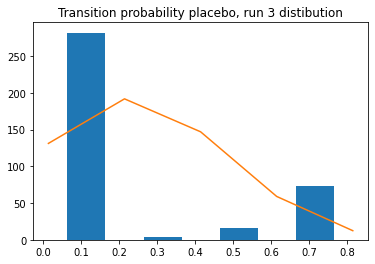

In [15]:
plcb_run3 = state_transitions_plcb[:,1,:,:]

p3_trans1 = np.concatenate(plcb_run3, axis = 0)
plcb3 = np.concatenate(p3_trans1, axis = 0)

p3_loc, p3_scale = norm.fit(plcb3)
n3 = norm(loc=p3_loc, scale=p3_scale)
p3_stat, p3_pval = kstest(plcb3, n3.cdf)
print(f'KS-test for transition probability, placebo session, run 3: statistics {p3_stat}, p-value {p3_pval}')

plt.hist(plcb3, bins=np.arange(plcb3.min(), plcb3.max()+0.2, 0.2), rwidth=0.5)
p3_x = np.arange(plcb3.min(), plcb3.max()+0.2, 0.2)
plt.plot(p3_x, 120*n3.pdf(p3_x))
plt.title('Transition probability placebo, run 3 distibution')
plt.show()

### Step 13: Performing permutation test for placebo session between run 1 and run 3 ###

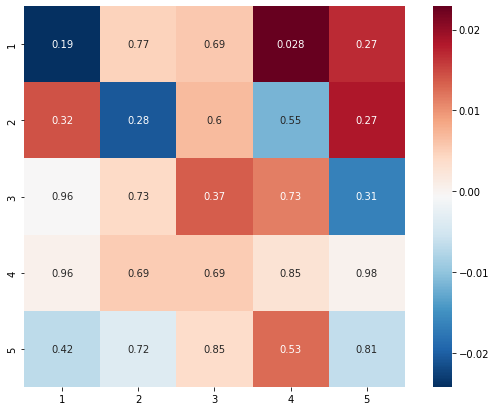

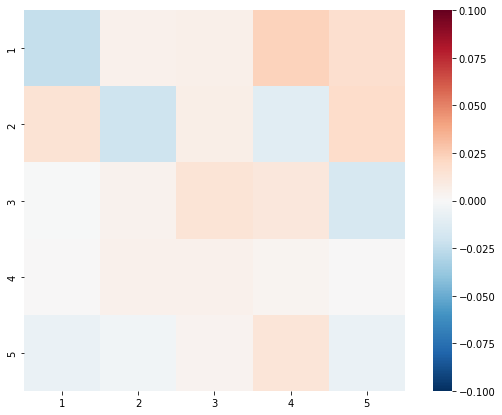

In [5]:
#Creating empty matrices to store the data
plcb_mm_diff_mean = np.zeros((5,5))
plcb_mm_pval = np.zeros((5,5))

#Calculating mean difference and p-value
for i in range(5):
    for j in range(5):
        diff_mean = np.mean(state_transitions_plcb[:,1,i,j] - state_transitions_plcb[:,0,i,j])
        plcb_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_plcb[:,1,i,j], state_transitions_plcb[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        plcb_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = plcb_mm_pval[:, :], xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.savefig(f'Figures/5_states/tp_plcb_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
plcb_ttest = sns.heatmap(plcb_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/5_states/tp_plcb_run13.png', dpi=300, bbox_inches='tight')

### Step 14: Calculating transition probability for LSD session ###

In [5]:
lsd_all = [bs_lsd_run1, bs_lsd_run3]
state_transitions_lsd = np.zeros((bs_lsd_run1.shape[0], 2, states_no, states_no))


for s, bs in enumerate(lsd_all):
    for sub in range(bs.shape[0]):   
            for i in range(states_no):
                for j in range(states_no):
                    count = 0
                    for l in range(bs.shape[1]-1):
                        if bs[sub, l] == i and bs[sub, l+1] == j:
                            count += 1
                            p = count/np.unique(bs[sub, :], return_counts=True)[1][i] #Calculating transition probability
                    state_transitions_lsd[sub, s, i, j] = p
                    
np.save('data/5_states/state_transitions_lsd_2.npy', state_transitions_lsd)

### Step 15: KS-test for transition probability for LSD session run 1 & 3 ###

#### Step 15.1: KS-test transition probability LSD session run 1 #####

KS-test for transition probability, LSD session, run 1: statistics 0.30097821460767415, p-value 1.2556394127315949e-30


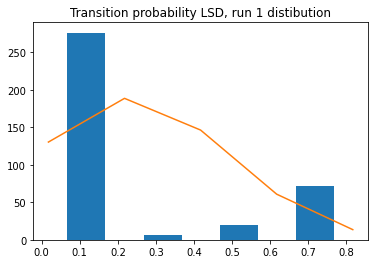

In [18]:
lsd_run1 = state_transitions_lsd[:,0,:,:]

l1_trans1 = np.concatenate(lsd_run1, axis = 0)
lsd1 = np.concatenate(l1_trans1, axis = 0)

l1_loc, l1_scale = norm.fit(lsd1)
n1 = norm(loc=l1_loc, scale=l1_scale)
l1_stat, l1_pval = kstest(lsd1, n1.cdf)
print(f'KS-test for transition probability, LSD session, run 1: statistics {l1_stat}, p-value {l1_pval}')

plt.hist(lsd1, bins=np.arange(lsd1.min(), lsd1.max()+0.2, 0.2), rwidth=0.5)
l1_x = np.arange(lsd1.min(), lsd1.max()+0.2, 0.2)
plt.plot(l1_x, 120*n1.pdf(l1_x))
plt.title('Transition probability LSD, run 1 distibution')
plt.show()

#### Step 15.2: KS-test transition probability LSD session run 3 ####

KS-test for transition probability, LSD session, run 3: statistics 0.33531533298577154, p-value 4.2284596180626733e-38


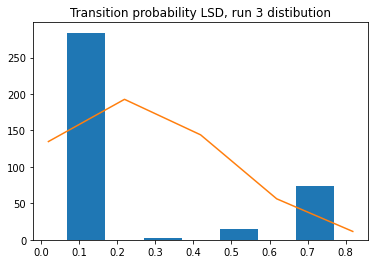

In [19]:
lsd_run3 = state_transitions_lsd[:,1,:,:]

l3_trans1 = np.concatenate(lsd_run3, axis = 0)
lsd3 = np.concatenate(l3_trans1, axis = 0)

l3_loc, l3_scale = norm.fit(lsd3)
n3 = norm(loc=l3_loc, scale=l3_scale)
l3_stat, l3_pval = kstest(lsd3, n3.cdf)
print(f'KS-test for transition probability, LSD session, run 3: statistics {l3_stat}, p-value {l3_pval}')

plt.hist(lsd3, bins=np.arange(lsd3.min(), lsd3.max()+0.2, 0.2), rwidth=0.5)
l3_x = np.arange(lsd3.min(), lsd3.max()+0.2, 0.2)
plt.plot(l3_x, 120*n3.pdf(l3_x))
plt.title('Transition probability LSD, run 3 distibution')
plt.show()

### Step 16: Performing permutation for LSD session between run 1 and run 3 ###

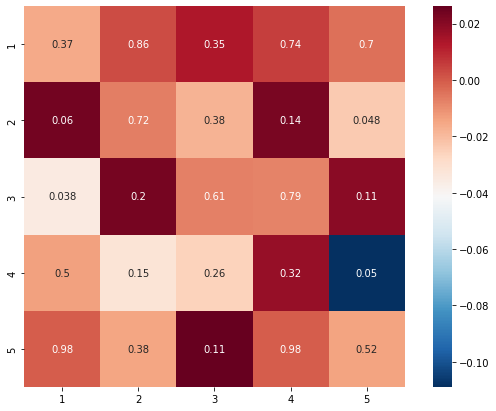

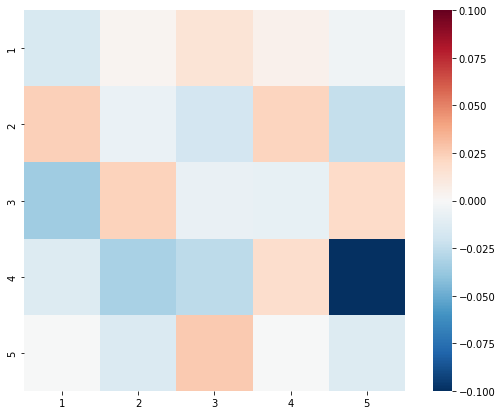

In [8]:
#Creating empty matrices to store the data
lsd_mm_diff_mean = np.zeros((5,5))
lsd_mm_pval = np.zeros((5,5))

#Calculating mean difference and p-value
for i in range(5):
    for j in range(5):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_lsd[:,0,i,j])
        lsd_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_lsd[:,0,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        lsd_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = lsd_mm_pval[:, :], xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.savefig(f'Figures/5_states/tp_lsd_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
lsd_ttest = sns.heatmap(lsd_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/5_states/tp_lsd_run13.png', dpi=300, bbox_inches='tight')

### Step 17: Performing permutation test for run 3 between LSD and placebo session ###

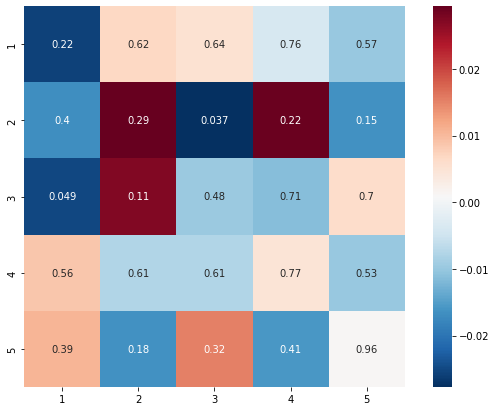

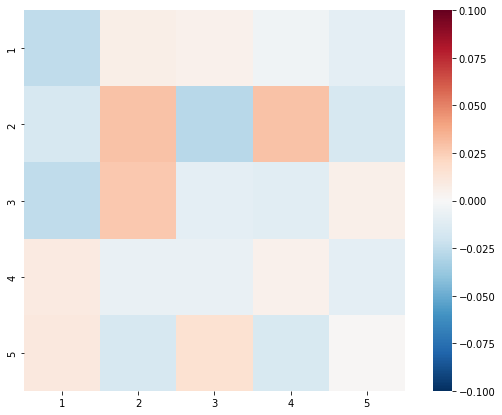

In [10]:
#Creating empty matrices to store the data
run3_mm_diff_mean = np.zeros((5,5))
run3_mm_pval = np.zeros((5,5))

#Calculating mean difference and p-value
for i in range(5):
    for j in range(5):
        diff_mean = np.mean(state_transitions_lsd[:,1,i,j] - state_transitions_plcb[:,1,i,j])
        run3_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(state_transitions_lsd[:,1,i,j], state_transitions_plcb[:,1,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        run3_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run3_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = run3_mm_pval[:, :], xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.savefig(f'Figures/5_states/tp_lsd-plcb_run3_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
run2_ttest = sns.heatmap(run3_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/5_states/tp_lsd-plcb_run3.png', dpi=300, bbox_inches='tight')

### Step 18: Performing permutation test for differences in both sessions between run 3 and run 1 ###

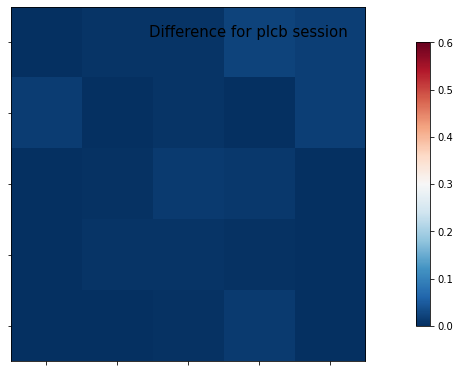

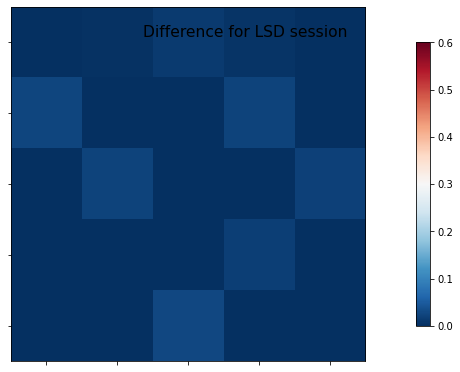

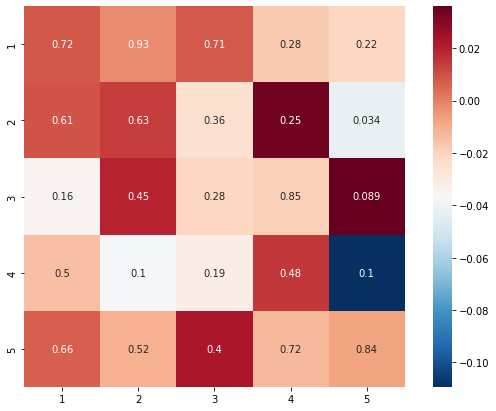

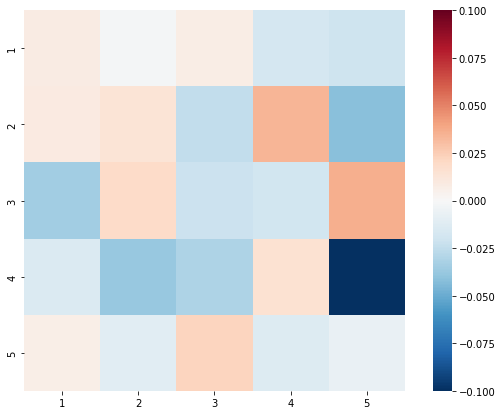

In [6]:
#Calculating difference for placebo session
plcb_difference = state_transitions_plcb[:,1,:,:] - state_transitions_plcb[:,0,:,:]

#Calculating difference for LSD session
lsd_difference = state_transitions_lsd[:,1,:,:] - state_transitions_lsd[:,0,:,:]

plot_matrix(plcb_difference.mean(axis=0), title = 'Difference for plcb session', vmin = 0.0, vmax=0.6)
plot_matrix(lsd_difference.mean(axis=0), title = 'Difference for LSD session', vmin = 0.0, vmax=0.6)


#Creating empty matrices to store the data
diff_mm_diff_mean = np.zeros((5,5))
diff_mm_pval = np.zeros((5,5))

#Calculating mean difference and p-value
for i in range(5):
    for j in range(5):
        diff_mean = np.mean(lsd_difference[:,i,j] - plcb_difference[:,i,j])
        diff_mm_diff_mean[i,j] = diff_mean
        p_value = permutation_test(lsd_difference[:,i,j], plcb_difference[:,i,j], method = 'approximate', num_rounds = 10000, seed = 0, paired = True)
        diff_mm_pval[i,j] = round(p_value, 10)
        
#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, annot = diff_mm_pval[:, :], xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5])
plt.savefig(f'Figures/5_states/tp_lsd-plcb_diff_run13_annot.png', dpi=300, bbox_inches='tight')

#Plotting statistics
plt.figure(figsize=(10,7))
diff_ttest = sns.heatmap(diff_mm_diff_mean, square = True, cmap = "RdBu_r", cbar= True, xticklabels = [1,2,3,4,5], yticklabels = [1,2,3,4,5], vmin=-0.1, vmax=0.1)
plt.savefig(f'Figures/5_states/tp_lsd-plcb_diff_run13.png', dpi=300, bbox_inches='tight')